In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib #only needed to determine Matplotlib version number
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers.recurrent import SimpleRNN
from keras.layers.core import Dense, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential
# Enable inline plotting
%matplotlib inline

In [22]:
LOCATION = "USD_AUD"
BASE_DIR = "./chart_data/daily/{}/".format(LOCATION)
FILE_LIST = ["1980_1983.csv","1984_1987.csv","1988_1991.csv",
             "1992_1995.csv","1996_1999.csv","2000_2003.csv",
             "2004_2007.csv","2008_2011.csv","2012_2015.csv","2016_2018.csv"]

In [23]:
# 指定した国間のすべてのデータを読み込み
# 空の場合None入れる
df_list = []
for file in FILE_LIST:
    try:
        df = pd.read_csv(BASE_DIR + file)
        df_list.append(df)
    except:
        print("error")
        df = pd.DataFrame()
        df_list.append(None)

error
error


In [24]:
print(type(df_list[0]))

<class 'NoneType'>


In [25]:
df_concated = pd.DataFrame()    # データフレームを空で初期化

# DataFrameが存在すれば結合なければスキップ
# インデックスは振り直す
for df in df_list:
    if type(df) == type(None):
        continue
    df_concated = pd.concat([df_concated,df], ignore_index=True)

In [26]:
df_concated

,Jul.Day,YYYY/MM/DD,Wdy,USD/AUD
0,2448259,1991/01/02,Wed,0.77398
1,2448260,1991/01/03,Thu,0.77896
2,2448261,1991/01/04,Fri,0.77949
3,2448264,1991/01/07,Mon,0.77834
4,2448265,1991/01/08,Tue,0.77879
5,2448266,1991/01/09,Wed,0.77278
6,2448267,1991/01/10,Thu,0.77340
7,2448268,1991/01/11,Fri,0.77298
8,2448271,1991/01/14,Mon,0.77699
9,2448272,1991/01/15,Tue,0.78151


[Max] ['2011/07/27' '2011/07/28'] : 1.10249
[Min] ['2001/04/02'] : 0.48313999999999996


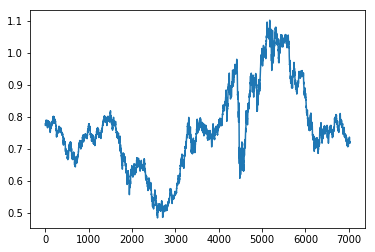

In [27]:
df_concated[LOCATION.replace("_","/")].plot(x=df_concated["YYYY/MM/DD"])

max_value = df_concated[LOCATION.replace("_","/")].max()
max_time = df_concated["YYYY/MM/DD"][df_concated[LOCATION.replace("_","/")] == max_value].values

min_value = df_concated[LOCATION.replace("_","/")].min()
min_time = df_concated["YYYY/MM/DD"][df_concated[LOCATION.replace("_","/")] == min_value].values

print("[Max] {} : {}".format(max_time,max_value))
print("[Min] {} : {}".format(min_time,min_value))

In [28]:
# LOCATIONの名前を使ってデータの特定の列をリストに変換
df_list = df_concated[LOCATION.replace("_","/")].values.tolist()

In [29]:
def _load_data(df_list,n_prev=100):
    data = []
    target = []
    
    for i in range(0,len(df_list) - n_prev):
        data.append(df_list[i:i+n_prev])
        target.append(df_list[i+n_prev])
    X = np.array(data).reshape(len(data),n_prev,1)
    Y = np.array(target).reshape(len(target),1)
    
    # データの分割
    N_train = int(len(data) * 0.9)
    N_validation = len(data) - N_train
    
    X_train, X_validation, Y_train, Y_validation = \
    train_test_split(X, Y, test_size=N_validation)
    
    return X_train,X_validation,Y_train,Y_validation
    

In [124]:
maxlen = 20
n_hidden = 20

X_train,X_validation,Y_train,Y_validation = _load_data(df_list,maxlen)

early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model = Sequential()
model.add(SimpleRNN(n_hidden,input_shape=(maxlen,1)))
model.add(Dense(1))
optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
model.compile(loss='mean_squared_error',
              optimizer=optimizer)

ValueError: cannot reshape array of size 126040 into shape (6302,1)

In [31]:
epochs = 500
batch_size = 10

model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_validation, Y_validation),
         callbacks=[early_stopping]
         )

Train on 6302 samples, validate on 701 samples
Epoch 1/500
6302/6302 [==============================] - 1s 207us/step - loss: 0.0091 - val_loss: 1.8167e-04
Epoch 2/500
6302/6302 [==============================] - 1s 185us/step - loss: 1.6055e-04 - val_loss: 1.5965e-04
Epoch 3/500
6302/6302 [==============================] - 1s 185us/step - loss: 1.3404e-04 - val_loss: 1.4699e-04
Epoch 4/500
6302/6302 [==============================] - 1s 188us/step - loss: 1.2939e-04 - val_loss: 1.1286e-04
Epoch 5/500
6302/6302 [==============================] - 1s 190us/step - loss: 1.0724e-04 - val_loss: 1.9713e-04
Epoch 6/500
6302/6302 [==============================] - 1s 187us/step - loss: 1.1061e-04 - val_loss: 1.5182e-04
Epoch 7/500
6302/6302 [==============================] - 1s 196us/step - loss: 9.0264e-05 - val_loss: 1.1492e-04
Epoch 8/500
6302/6302 [==============================] - 1s 196us/step - loss: 8.7802e-05 - val_loss: 8.8360e-05
Epoch 9/500
6302/6302 [==============================

In [111]:
# テストデータでの精度を見てみる
predicted = []
target = []
for i in range(len(X_validation)):
    predicted.append(model.predict(X_validation[i:i+1])[0][0])
    target.append(X_validation[i][0][0])

In [112]:
t = np.arange(len(predicted))

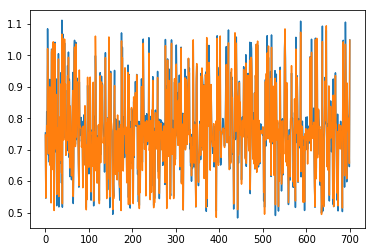

In [113]:
# 大まか間違いはない。（当然）
plt.plot(t,predicted)
plt.plot(t,target)
plt.show()

In [114]:
# 更にその先の予測をしてみる

In [115]:
# リストはこのように変換すれば良い
length = len(predicted)
print(np.array(predicted[length-maxlen-1:-1]).reshape(1,maxlen,1))

[[[0.7346846 ]
  [0.76352334]
  [0.75274295]
  [0.5031025 ]
  [0.9019152 ]
  [1.0476215 ]
  [0.75662005]
  [0.793342  ]
  [0.58088976]
  [0.79117286]
  [1.1054757 ]
  [0.94988567]
  [0.7234271 ]
  [0.5978073 ]
  [0.8807287 ]
  [0.81581986]
  [0.79706806]
  [0.7819558 ]
  [0.7491155 ]
  [0.6459757 ]]]


In [116]:
predicted_future = []
for i in range(50):
    length = len(predicted)
    input_array = np.array(predicted[length-maxlen-1:-1]).reshape(1,maxlen,1)
    v = model.predict(input_array)[0][0]
    predicted.append(v)
    predicted_future.append(v)

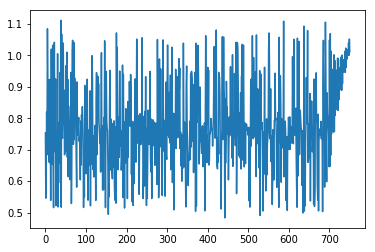

In [117]:
t = np.arange(len(predicted))
plt.plot(t,predicted)
plt.show()

In [121]:
"""
データ移行の値動き
2458470,"2018/12/17","Mon",0.71796
2458471,"2018/12/18","Tue",0.71808
2458472,"2018/12/19","Wed",0.71628
2458473,"2018/12/20","Thu",0.71197
2458474,"2018/12/21","Fri",0.70713
2458477,"2018/12/24","Mon",0.70542
2458480,"2018/12/27","Thu",0.70266
2458481,"2018/12/28","Fri",0.70458
2458484,"2018/12/31","Mon",0.70488
"""
predicted_future[:10]

[0.6463825,
 1.0690788,
 0.6818472,
 1.0131431,
 0.7500945,
 0.91944414,
 0.8560477,
 0.8239683,
 0.95609987,
 0.7559132]